In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [23]:
ogDF = pd.read_csv("./MainDataset.csv")

mainDF = ogDF.copy()

print(mainDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name of Painter              2500 non-null   object
 1   Subject of Painting          2500 non-null   object
 2   Style                        2500 non-null   object
 3   Medium                       2500 non-null   object
 4   Size                         2500 non-null   object
 5   Frame                        2500 non-null   object
 6   Location                     2500 non-null   object
 7   Price ($)                    2500 non-null   int64 
 8   Delivery (days)              2500 non-null   int64 
 9   Shipment                     2500 non-null   object
 10  Color Palette                2500 non-null   object
 11  Copy or Original             2500 non-null   object
 12  Print or Real                2500 non-null   object
 13  Recommended Environment      2500

In [24]:
print(mainDF.columns.tolist())


['Name of Painter', 'Subject of Painting', 'Style', 'Medium', 'Size', 'Frame', 'Location', 'Price ($)', 'Delivery (days)', 'Shipment', 'Color Palette', 'Copy or Original', 'Print or Real', 'Recommended Environment', 'Mood/Atmosphere', 'Theme/Lighting Requirements', 'Reproduction Type', 'Target Audience']


In [4]:
mainDF['Reproduction Type'] = mainDF['Reproduction Type'].fillna('Unknown')

print(mainDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name of Painter              2500 non-null   object
 1   Subject of Painting          2500 non-null   object
 2   Style                        2500 non-null   object
 3   Medium                       2500 non-null   object
 4   Size                         2500 non-null   object
 5   Frame                        2500 non-null   object
 6   Location                     2500 non-null   object
 7   Price ($)                    2500 non-null   int64 
 8   Delivery (days)              2500 non-null   int64 
 9   Shipment                     2500 non-null   object
 10  Color Palette                2500 non-null   object
 11  Copy or Original             2500 non-null   object
 12  Print or Real                2500 non-null   object
 13  Recommended Environment      2500

In [25]:
# change price column name
mainDF = mainDF.rename(columns={'Price ($)': 'Price'})
print(mainDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name of Painter              2500 non-null   object
 1   Subject of Painting          2500 non-null   object
 2   Style                        2500 non-null   object
 3   Medium                       2500 non-null   object
 4   Size                         2500 non-null   object
 5   Frame                        2500 non-null   object
 6   Location                     2500 non-null   object
 7   Price                        2500 non-null   int64 
 8   Delivery (days)              2500 non-null   int64 
 9   Shipment                     2500 non-null   object
 10  Color Palette                2500 non-null   object
 11  Copy or Original             2500 non-null   object
 12  Print or Real                2500 non-null   object
 13  Recommended Environment      2500

In [37]:
# TURN SIZE COLUMN INTO TWO SEPARATE COLUMSN LABELED WIDTH AND HEIGHT
#mainDF['Size'] = mainDF['Size'].str.replace('"', '')              
#mainDF[['Width', 'Height']] = mainDF['Size'].str.split('x', expand=True).astype(int)
#mainDF.drop(columns=['Size'], inplace=True)


# Add Area and Aspect Ratio columns
mainDF['Area'] = mainDF['Width'] * mainDF['Height']
mainDF['AspectRatio'] = mainDF['Width'] / mainDF['Height']

print("ORIGINAL")
print(ogDF.head()[['Size']])

print("")

print("NEW COLUMNS")
print(mainDF.head()[['Width', 'Height', 'AspectRatio', 'Area']])

ORIGINAL
      Size
0  20"x30"
1  20"x30"
2  18"x24"
3  18"x24"
4  30"x40"

NEW COLUMNS
   Width  Height  AspectRatio  Area
0     20      30     0.666667   600
1     20      30     0.666667   600
2     18      24     0.750000   432
3     18      24     0.750000   432
4     30      40     0.750000  1200


In [28]:
# Strip whitespace from categorical columns
cat_cols = mainDF.select_dtypes('object').columns
mainDF[cat_cols] = mainDF[cat_cols].apply(lambda col: col.str.strip())

print(mainDF.head())

  Name of Painter Subject of Painting                   Style      Medium  \
0            Noah            Seascape  Abstract Expressionism  Watercolor   
1         Vincent            Abstract  Abstract Expressionism    Charcoal   
2             Ava          Still Life                  Modern  Watercolor   
3            Liam            Wildlife                  Cubism     Acrylic   
4          Olivia           Landscape  Abstract Expressionism    Charcoal   

  Frame Location  Price  Delivery (days)       Shipment  Color Palette  \
0   Yes  Chicago    459                6  Free Shipping  Neutral Tones   
1    No    Miami    657                6  Free Shipping     Cool Tones   
2    No    Miami    907                7       Standard     Cool Tones   
3    No  Calgary    649                3       Standard  Oceanic Tones   
4   Yes    Miami    539                5  Free Shipping   Earthy Tones   

  Copy or Original Print or Real Recommended Environment Mood/Atmosphere  \
0         Origin

In [29]:
# Label Encode ALL categorical columns
le = LabelEncoder()
for col in mainDF.select_dtypes('object'):
    mainDF[col] = le.fit_transform(mainDF[col])

print(mainDF.head())

   Name of Painter  Subject of Painting  Style  Medium  Frame  Location  \
0                7                    4      0       4      1         1   
1               10                    0      0       1      0         3   
2                0                    5      3       4      0         3   
3                6                    6      1       0      0         0   
4                8                    2      0       1      1         3   

   Price  Delivery (days)  Shipment  Color Palette  Copy or Original  \
0    459                6         1              2                 1   
1    657                6         1              0                 1   
2    907                7         2              0                 1   
3    649                3         2              3                 1   
4    539                5         1              1                 0   

   Print or Real  Recommended Environment  Mood/Atmosphere  \
0              0                        0             

<Axes: xlabel='Price'>

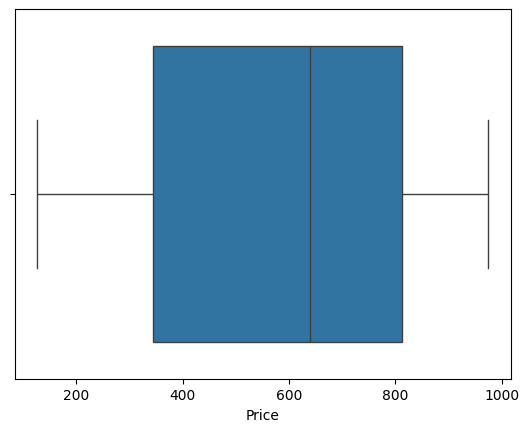

In [35]:
# CHECK FOR OUTLIERS
sns.boxplot(x=mainDF['Price'])

In [ ]:
mainDF['price_z'] = zscore(mainDF['Price'])
mainDF[mainDF['price_z'].abs() > 3]

# returns 0 rows, no outliers

,Name of Painter,Subject of Painting,Style,Medium,Frame,Location,Price,Delivery (days),Shipment,Color Palette,Copy or Original,Print or Real,Recommended Environment,Mood/Atmosphere,Theme/Lighting Requirements,Reproduction Type,Target Audience,Width,Height,price_z


In [ ]:
# define target + feature sets
target_col = 'Price'
numeric_cols = ['Delivery (days)', 'Width', 'Height']

X = mainDF.drop(columns=[target_col])
y = mainDF[target_col].values

# split BEFORE scaling/encoding (to avoid leakage)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# split numeric vs categorical
cat_cols = [c for c in X.columns if c not in numeric_cols]

# one-hot encode categoricals
X_train_cat = pd.get_dummies(X_train_raw[cat_cols], drop_first=True)
X_test_cat  = pd.get_dummies(X_test_raw[cat_cols],  drop_first=True)

# align columns between train/test (important)
X_train_cat, X_test_cat = X_train_cat.align(X_test_cat, join='left', axis=1, fill_value=0)

# scale numeric features
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train_raw[numeric_cols])
X_test_num  = scaler.transform(X_test_raw[numeric_cols])

# concat numeric + one-hot
X_train = np.hstack([X_train_num, X_train_cat.values])
X_test  = np.hstack([X_test_num,  X_test_cat.values])

input_dim = X_train.shape[1]

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # regression: no activation
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print("Test MAE:", test_mae)
